In [3]:
from scipy import stats
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Uma distribuição normal - contínua

 - media - mean - loc
 - desvio padrão - scale

In [4]:
mu  = 2
sdv = 4
N   = 1000

samples = np.random.normal(loc=mu, scale=sdv, size=N)
len(samples), np.min(samples), np.max(samples)

(1000, -12.182553049842282, 17.26592724106689)

### Média e Desvio Padrão Amostral calculados dos valores obtidos pela máquina randômica

In [5]:
muc = np.mean(samples)
sdvc = np.std(samples)

muc, sdvc

(1.852779437249925, 3.967187137156966)

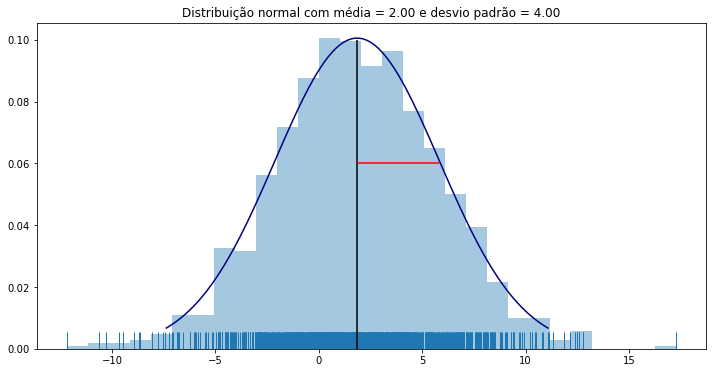

In [7]:
fig = plt.figure(figsize=(12, 6))

ax = sns.distplot(samples, kde=False, rug=True, norm_hist=True,);
plt.vlines(muc, 0, 0.1, color = 'black');
plt.hlines(0.06, muc, muc+sdvc, color = 'red');

#--- fitando a distribuição normal com muc e sdvc
#---                          Percent Point Function (PPF)
seqx = np.linspace(stats.norm.ppf(0.01, muc, sdvc), stats.norm.ppf(0.99, muc, sdvc), 100)
sns.lineplot(seqx, stats.norm.pdf(seqx, muc, sdvc), color='navy')

title = 'Distribuição normal com média = %.2f e desvio padrão = %.2f'%(mu, sdv)
plt.title(title);

### O que é uma distribuição Z

uma distribuição Z é uma distribuição centrada em 0 e com desvio padrão = 1
ou seja é uma distribuição normalizada


<font size="5">Z = $\frac{x -\mu}{SSD}$</font>

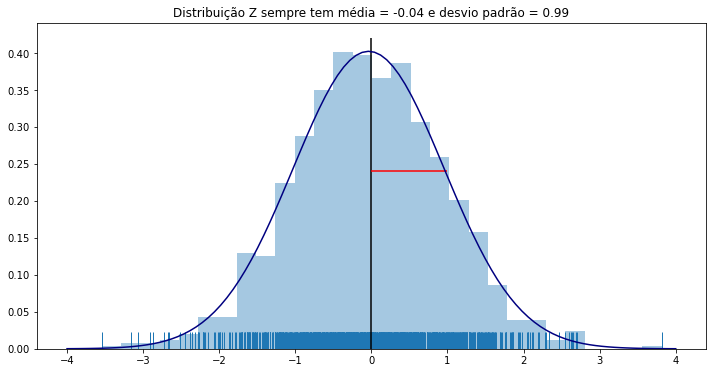

In [13]:
z = (samples-mu)/sdv

muZ = np.mean(z)
sdvZ = np.std(z)

fig = plt.figure(figsize=(12, 6))

ax = sns.distplot(z, kde=False, rug=True, norm_hist=True,);
plt.vlines(0, 0, 0.42, color = 'black');
plt.hlines(.24, 0, 0+sdvZ, color = 'red');

#--- fitando a distribuição normal com muc e sdvc
#---                          Percent Point Function (PPF)
# seqx = np.linspace(stats.norm.ppf(0.01, muZ, sdvZ), stats.norm.ppf(0.99, muZ, sdvZ), 100)
seqx = np.linspace(-4, 4, 100)
sns.lineplot(seqx, stats.norm.pdf(seqx, muZ, sdvZ), color='navy')

title = 'Distribuição Z sempre tem média = %.2f e desvio padrão = %.2f'%(muZ, sdvZ)
plt.title(title);

### Como se compara duas distribuições Z?

a primeira distribuição é a controle
dela obtemos a média e o desvio padrão

a segunda distribuição é o case
obetmos a distribuição z 

3.0682029205598127


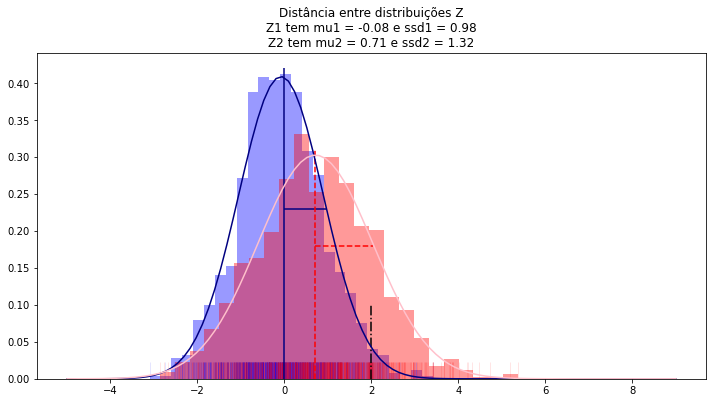

In [33]:
mu1 = 2; sdv1 = 1.5
mu2 = 3; sdv2 = 2.0
N   = 1000

samp1 = np.random.normal(loc=mu1, scale=sdv1, size=N)
samp2 = np.random.normal(loc=mu2, scale=sdv2, size=N)
print(np.mean(samp2))

z1 = (samp1-mu1)/sdv1
#-- z2 em relação aos parâmetros de z1 !!!
z2 = (samp2-mu1)/sdv1

muZ1 = np.mean(z1); sdvZ1 = np.std(z1)
muZ2 = np.mean(z2); sdvZ2 = np.std(z2)

muc1 = np.mean(z1); sdvc1 = np.std(z1)
muc2 = np.mean(z2); sdvc2 = np.std(z2)

fig = plt.figure(figsize=(12, 6))

ax  = sns.distplot(z1, kde=False, rug=True, norm_hist=True, color='blue', rug_kws={"color": 'blue', "alpha": .1,})
ret = sns.distplot(z2, kde=False, rug=True, norm_hist=True, color='red',  rug_kws={"color": 'red',  "alpha": .1,}, ax=ax)

plt.vlines(  0, 0, 0.42,    color = 'navy')
plt.hlines(.23, 0, 0+sdvZ1, color = 'navy');

plt.vlines(  muc2, 0, 0.31, color = 'red', linestyle='--')
plt.hlines(.18, muc2, muc2+sdvZ2, color = 'red', linestyle='--')

plt.vlines(2, 0, 0.1, color = 'black', linestyle='-.')

#--- fitando a distribuição normal com muc e sdvc
#---                          Percent Point Function (PPF)
# seqx = np.linspace(mu1-4*sdv1, mu2+4*sdv2, 100)
seqx = np.linspace(-5, 9, 100)
sns.lineplot(seqx, stats.norm.pdf(seqx, muZ1, sdvZ1), color='navy')
sns.lineplot(seqx, stats.norm.pdf(seqx, muZ2, sdvZ2), color='pink')

title = 'Distância entre distribuições Z'
title += '\nZ1 tem mu1 = %.2f e ssd1 = %.2f'%(muc1, sdvc1)
title += '\nZ2 tem mu2 = %.2f e ssd2 = %.2f'%(muc2, sdvc2)
plt.title(title);

### Pontos em Z2 além de 2 (SSD)

In [34]:
z2_sig = z2[z2 > 2]
len(z2_sig), z2_sig[:10]

(160,
 array([2.25926957, 2.91164207, 2.61234484, 2.71878351, 2.69971219,
        2.94640895, 3.68100979, 2.03277432, 2.53980044, 2.20092104]))

### Distância entre distribuições - preparação para o teste-t

In [35]:
mus = [1, 3]
sds = [0.3, 0.8]
N = 1000

samp1 = np.random.normal(mus[0], sds[0], N)
samp2 = np.random.normal(mus[1], sds[1], N)

df = pd.DataFrame([samp1, samp2]).T
df.columns=['dist1', 'dist2']
df.head(3)

,dist1,dist2
0,0.727125,3.284773
1,0.682508,3.186305
2,1.113378,1.817673


### Duas distribuições sobrepostas

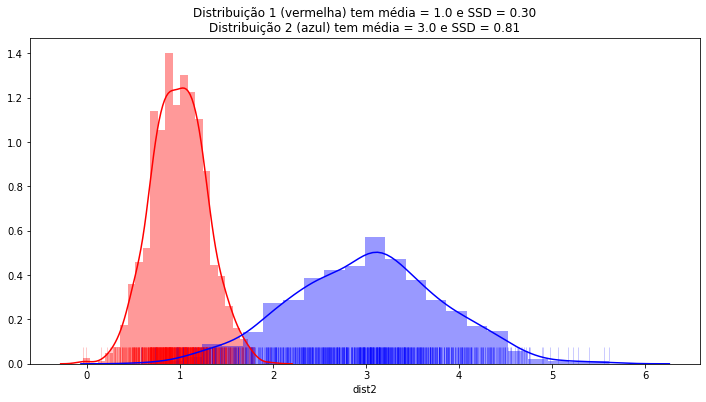

In [112]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(12, 6))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], hist=True, kde=True, rug=True,
                rug_kws={"color": colors[i], "alpha": .2,})

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

    
title  =   "Distribuição 1 (vermelha) tem média = %.1f e SSD = %.2f"%(mu1, sd1)
title += "\nDistribuição 2 (azul) tem média = %.1f e SSD = %.2f"%(mu2, sd2)
plt.title(title);

### Criando o eixo x

In [113]:
seqxs = []
seqx1 = np.linspace(stats.norm.ppf(0.01, mus[0], sds[0]), stats.norm.ppf(0.99, mus[0], sds[0]), 100)
seqxs.append(seqx1)
seqx1[:5], seqx1[-10:-1]

(array([0.30209564, 0.31619472, 0.33029379, 0.34439287, 0.35849195]),
 array([1.57101266, 1.58511174, 1.59921082, 1.61330989, 1.62740897,
        1.64150805, 1.65560713, 1.66970621, 1.68380528]))

In [114]:
seqx2 = np.linspace(stats.norm.ppf(0.01, mus[1], sds[1]), stats.norm.ppf(0.99, mus[1], sds[1]), 100)
seqxs.append(seqx2)
seqx2[:5], seqx2[-10:-1]

(array([1.1389217 , 1.17651924, 1.21411678, 1.25171432, 1.28931187]),
 array([4.52270043, 4.56029797, 4.59789551, 4.63549305, 4.67309059,
        4.71068813, 4.74828568, 4.78588322, 4.82348076]))

### Teste t

statistician William Sealy Gosset 

<font size="5">t-stat = $\frac{<X>-\mu}{\frac{S}{\sqrt(n)}}$</font>

In [115]:
sta, pval = stats.ttest_ind(df.dist1, df.dist2)
sta, pval

alpha=0.05

#text_stat = "t-test statistics = %.2f, p-val = %.2e"%(sta, pval)
text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)

if pval < alpha:
    # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
    text_stat = 'Distribuições estatiscamente diferentes, H0 precisa ser refutado\n' + text_stat
else:
    #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
    text_stat = 'Distribuições estatiscamente similar, H0 precisa ser aceito\n' + text_stat

text_stat    

'Distribuições estatiscamente diferentes, H0 precisa ser refutado\nestatística t-test = -74.31, p-val = 0.00e+00'

### Coeficiente de variação

<font size="5">$CV = \frac{SD}{mu}$</font>

### Tamanho do efeito (effect size)

https://en.wikipedia.org/wiki/Effect_size

<font size="5">$\theta = \frac{\mu_1 -\mu_2}{SD}$</font>

### Tamanho do efeito (effect size)

https://en.wikipedia.org/wiki/Effect_size

<font size="5">$\theta = \frac{\mu_1 -\mu_2}{SD}$</font>


### Markdown

https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/ 
    
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
    

### Revendo o gráfico com todas as estatísticas

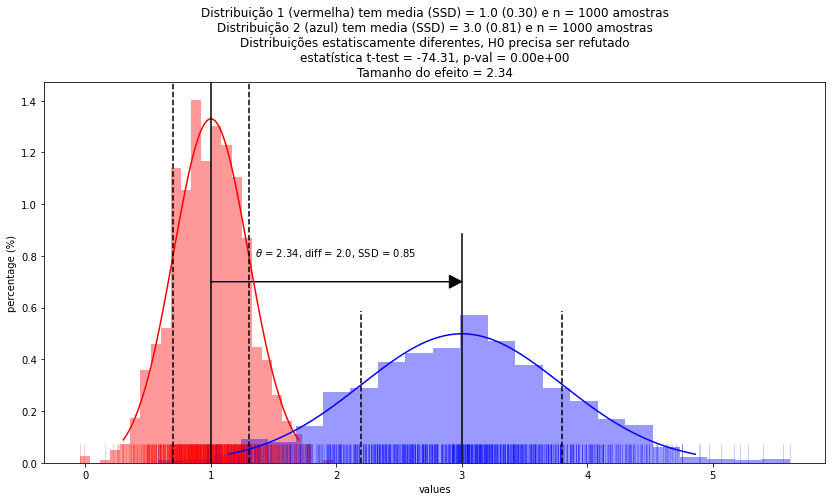

In [116]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 7))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,})
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i])

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

plt.axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
plt.axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
plt.axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

plt.axvline(x=mus[1], ymin=0, ymax=.6, color='black')
plt.axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
plt.axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)
yarrow = 0.7

plt.arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
plt.text(x=(xdiff-.65), y=(yarrow+.1), s=text)
plt.xlabel("values")
plt.ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat + '\nTamanho do efeito = %.2f'%(EffSize)
plt.title(title);

### Fazendo um stack para o barplot

In [117]:
df2 = pd.DataFrame(df.dist1)
df2['class'] = 'um'
df2.columns = ['val', 'class']

dfa = pd.DataFrame(df.dist2)
dfa['class'] = 'dois'
dfa.columns = ['val', 'class']

# df2 = pd.concat([df2, dfa])
df2 = df2.append(dfa)
df2.tail(3)

,val,class
997,3.575708,dois
998,3.101853,dois
999,2.256672,dois


### Barplot invertido

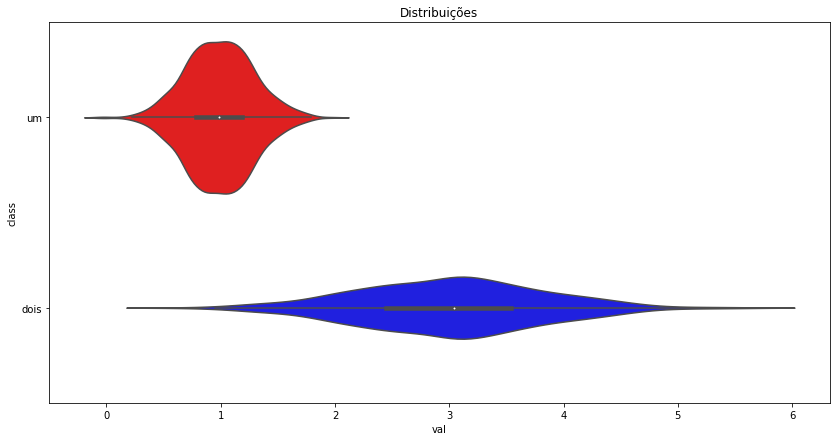

In [118]:
fig = plt.figure(figsize=(14, 7))
#sns.set(rc={"figure.figsize": (6,4)})
sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue']) # , saturation=.05)
plt.title("Distribuições");

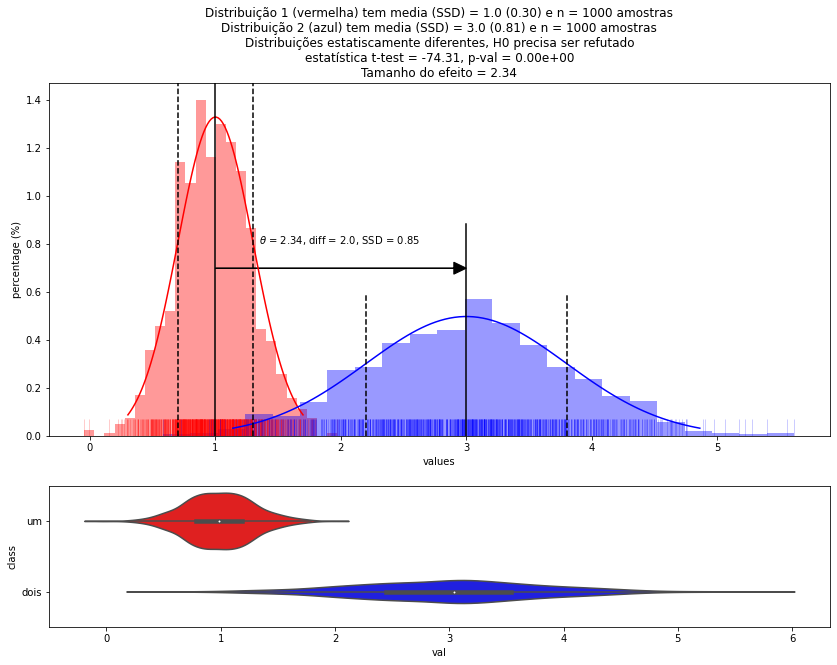

In [119]:
from matplotlib import gridspec

# f, axes = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2])

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1]))

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,}, ax=axes[0])
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i], ax=axes[0])



axes[0].axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
axes[0].axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
axes[0].axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

axes[0].axvline(x=mus[1], ymin=0, ymax=.6, color='black')
axes[0].axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
axes[0].axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)
yarrow = 0.7

axes[0].arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
axes[0].text(x=(xdiff-.65), y=(yarrow+.1), s=text)
axes[0].set_xlabel("values")
axes[0].set_ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat + '\nTamanho do efeito = %.2f'%(EffSize)
axes[0].set_title(title);

df2 = pd.DataFrame(df.dist1)
df2['class'] = 'um'
df2.columns = ['val', 'class']

dfa = pd.DataFrame(df.dist2)
dfa['class'] = 'dois'
dfa.columns = ['val', 'class']

# df2 = pd.concat([df2, dfa])
df2 = df2.append(dfa)

sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue'], ax=axes[1]); # , saturation=.05)

In [120]:
def plot_2_distributions(df, xlim, alpha=0.05):

    colors = ['red', 'blue']
    fig = plt.figure(figsize=(14, 7))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2]) 

    axes = []
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1]))


    for i in range(2):
        sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                    rug_kws={"color": colors[i], "alpha": .2,}, ax=axes[0])

        sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i], ax=axes[0])

        
    #----------- statistics --------------------
    #-- ttest
    
    sta, pval = stats.ttest_ind(df.dist1, df.dist2)
    #text_stat = "t-test statistics = %.2f, p-val = %.2e"%(sta, pval)
    text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)

    if pval < alpha:
        # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
        text_stat = 'Distribuições estatiscamente diferentes, H0 precisa ser refutado\n' + text_stat
    else:
        #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
        text_stat = 'Distribuições estatiscamente similar, H0 precisa ser aceito\n' + text_stat
    
    #-- params
    mu1 = df.dist1.mean()
    sd1 = df.dist1.std()

    mu2 = df.dist2.mean()
    sd2 = df.dist2.std()

    axes[0].axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
    axes[0].axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
    axes[0].axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

    axes[0].axvline(x=mus[1], ymin=0, ymax=.6, color='black')
    axes[0].axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
    axes[0].axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

    head_width = 0.05

    # nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
    SSD = np.sqrt(sds[0]**2 + sds[1]**2)
    EffSize = (mus[1] - mus[0]) / SSD

    diff = mus[1]-mus[0]
    xdiff = mus[1] - (diff/2)
    yarrow = 0.7

    # axes[0].arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

    text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
    # axes[0].text(x=(xdiff-.65), y=(yarrow+.1), s=text)
    axes[0].set_xlabel("values")
    axes[0].set_ylabel("percentage (%)")
    axes[0].set_xlim(xlim);

    title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
    title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
    title += '\n' + text_stat + '\nTamanho do efeito = %.2f, distância = %.1f, SSDtot = %.2f'%(EffSize, diff, SSD)
    axes[0].set_title(title);
    
    #--- concat dist1, dist2
    df2 = pd.DataFrame(df.dist1)
    df2['class'] = 'um'
    df2.columns = ['val', 'class']

    dfa = pd.DataFrame(df.dist2)
    dfa['class'] = 'dois'
    dfa.columns = ['val', 'class']

    # df2 = pd.concat([df2, dfa])
    df2 = df2.append(dfa)


    sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue'], ax=axes[1]); # , saturation=.05)
    axes[1].set_xlim(xlim);

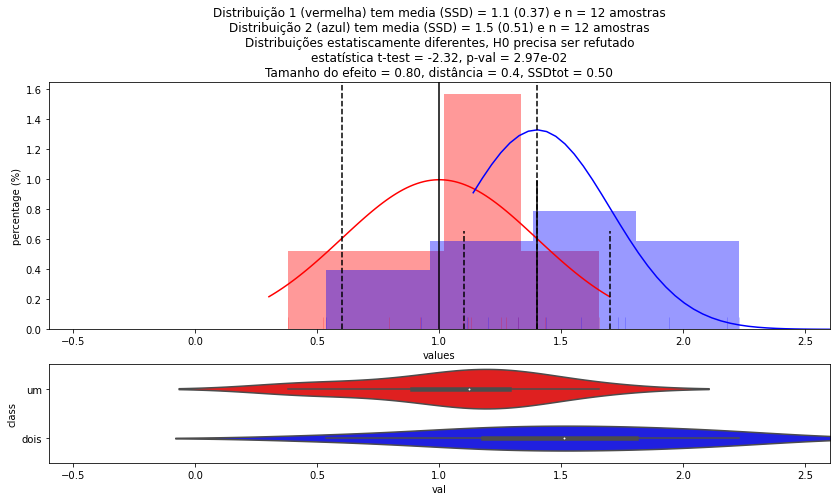

In [121]:
from scipy.stats import norm

mus = [1, 1.4]
sds = [0.4, 0.3]
xlim = [mus[0]-4*sds[0], mus[1]+4*sds[1]]
N = 12

j0 = np.random.normal(mus[0], sds[0], N)
j1 = np.random.normal(mus[1], sds[1], N)

df = pd.DataFrame([j0, j1]).T
df.columns=['dist1', 'dist2']

plot_2_distributions(df, xlim)

### Adendo da distribuição de chi-quadrado

(0.0, 9.0)

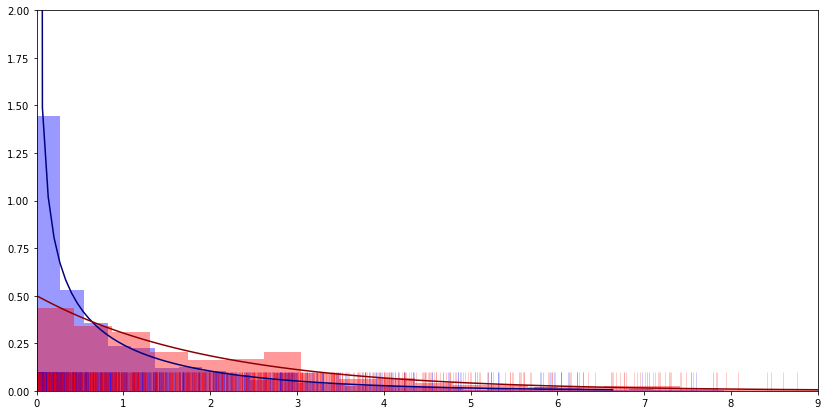

In [148]:
mu = 0
sdv = 1
N = 1000

dist1 = np.random.normal(mu, sdv, N)**2
dist2 = np.random.normal(mu, sdv, N)**2


chi2_2 = dist1 + dist2

plt.figure(figsize=(14,7))
ax = sns.distplot(dist1, color='blue',  hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'blue', "alpha": .2,})
ret = sns.distplot(chi2_2, color='red', hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'red', "alpha": .2,}, ax=ax)

# fit the chi2 distribution
from scipy import stats

df = 1
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='navy')

df = 2
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='darkred')

plt.ylim(0, 2)
plt.xlim(0,9)

(0.0, 9.0)

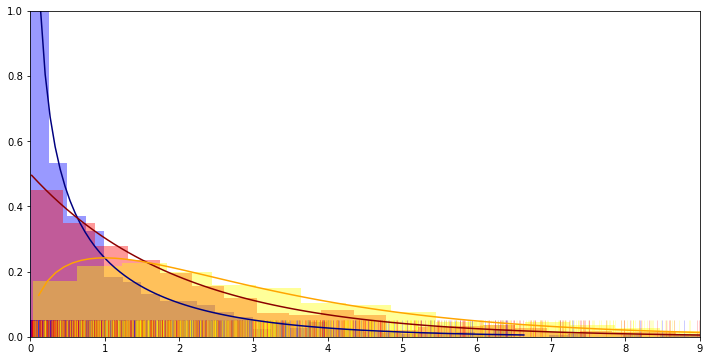

In [144]:
dist3 = np.random.normal(mu, sdv, N)**2

chi2_3 = dist1 + dist2 + dist3

plt.figure(figsize=(12,6))
ax  = sns.distplot(dist2,  color='blue',   hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'blue', "alpha": .2,})
ret = sns.distplot(chi2_2, color='red',    hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'red', "alpha": .2,}, ax=ax)
ret = sns.distplot(chi2_3, color='yellow', hist=True, kde=False, norm_hist=True, rug=True, rug_kws={"color": 'yellow', "alpha": .2,}, ax=ax)

df = 1
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='navy')

df = 2
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='darkred')

df = 3
xseq = np.linspace(stats.chi2.ppf(0.01, df), stats.chi2.ppf(0.99, df), 100)
ax.plot(xseq, stats.chi2.pdf(xseq, df), color='orange')

plt.ylim(0, 1)
plt.xlim(0,9)